<a href="https://colab.research.google.com/github/Longbuivu/Artifical-Intelligence/blob/main/10%20Mon%20An.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Các thư viện cần thiết
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#Kết nối với Google Drive
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [44]:
#Tạo dữ liệu
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/10 Mon An/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/10 Mon An/Validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 283 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [45]:
#Xử li dữ diệu
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 43808)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [46]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [47]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose=1)


Epoch 1/100
9/9 [==============================] - 3s 338ms/step - loss: 6.1945 - accuracy: 0.1131 - val_loss: 2.2959 - val_accuracy: 0.1400
Epoch 2/100
9/9 [==============================] - 3s 297ms/step - loss: 2.2863 - accuracy: 0.1731 - val_loss: 2.3001 - val_accuracy: 0.1000
Epoch 3/100
9/9 [==============================] - 3s 288ms/step - loss: 2.2317 - accuracy: 0.1767 - val_loss: 2.2906 - val_accuracy: 0.1000
Epoch 4/100
9/9 [==============================] - 3s 294ms/step - loss: 2.1668 - accuracy: 0.2261 - val_loss: 2.2363 - val_accuracy: 0.2800
Epoch 5/100
9/9 [==============================] - 3s 293ms/step - loss: 2.0546 - accuracy: 0.3357 - val_loss: 2.0408 - val_accuracy: 0.2400
Epoch 6/100
9/9 [==============================] - 3s 288ms/step - loss: 1.9404 - accuracy: 0.3887 - val_loss: 1.9130 - val_accuracy: 0.3800
Epoch 7/100
9/9 [==============================] - 3s 287ms/step - loss: 1.8371 - accuracy: 0.3710 - val_loss: 1.7827 - val_accuracy: 0.3800
Epoch 8/100
9

Sai số kiểm tra là:  0.017696438357234
Độ chính xác kiểm tra là:  1.0


<function matplotlib.pyplot.show>

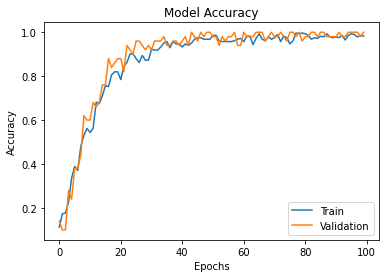

In [48]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [31]:
# Lưu mô hình
model.save('/content/drive/MyDrive/AI/10 Mon An/10_Mon_an.h5')

In [32]:
# Tải mô hình
model=load_model('/content/drive/MyDrive/AI/10 Mon An/10_Mon_an.h5')

In [49]:
#Gọi các lớp
classes=['Banh Cuon','Banh Mi','Banh Xeo','Bun Bo','Com Tam','Goi Cuon','Mi Quang','Nem','Pha Lau','Pho']


[[9.9962115e-01 2.0482771e-09 2.4684212e-07 1.6796423e-06 3.4237754e-08
  2.5444610e-11 4.2828938e-07 5.6172143e-05 3.1666894e-04 3.6317836e-06]]
Banh Cuon


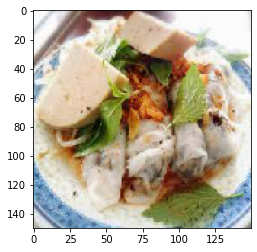

In [51]:
# Test
img=load_img("/content/drive/MyDrive/AI/10 Mon An/Test/Banh Cuon/Banhcuon 2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Banh Cuon'
if round(result[0][1])==1:
  prediction='Banh Mi'
if round(result[0][2])==1:
  prediction='Banh Xeo'
if round(result[0][3])==1:
  prediction='Bun Bo'
if round(result[0][4])==1:
  prediction='Com Tam'
if round(result[0][5])==1:
  prediction='Goi Cuon'
if round(result[0][6])==1:
  prediction='Mi Quang'
if round(result[0][7])==1:
  prediction='Nem Chua'
if round(result[0][8])==1:
  prediction='Pha Lau'
if round(result[0][9])==1:
  prediction='Pho'
print(prediction)

[[3.5087114e-10 1.2788217e-06 9.9244797e-01 7.5245481e-03 1.6723019e-08
  2.9428807e-07 2.4316345e-05 7.9216119e-07 3.8793049e-09 6.9100315e-07]]
Banh Xeo


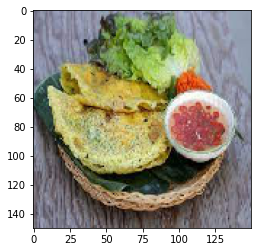

In [53]:
img=load_img("/content/drive/MyDrive/AI/10 Mon An/Test/Banh Xeo/Banhxeo 12.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Banh Cuon'
if round(result[0][1])==1:
  prediction='Banh Mi'
if round(result[0][2])==1:
  prediction='Banh Xeo'
if round(result[0][3])==1:
  prediction='Bun Bo'
if round(result[0][4])==1:
  prediction='Com Tam'
if round(result[0][5])==1:
  prediction='Goi Cuon'
if round(result[0][6])==1:
  prediction='Mi Quang'
if round(result[0][7])==1:
  prediction='Nem Chua'
if round(result[0][8])==1:
  prediction='Pha Lau'
if round(result[0][9])==1:
  prediction='Pho'
print(prediction)